<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Decision Trees and Ensemble methods

---

## What is a Random Forest?

---

Random Forests are some of the most widespread classifiers used. They are relatively simple to use because they require very few parameters to set and they perform well. As we have seen, Decision Trees are very powerful machine learning models.

Decision Trees have some critical limitations. In particular, trees that are grown very deep tend to learn highly irregular patterns: they overfit their training sets. Bagging helps mitigate this problem by exposing different trees to different sub-samples of the whole training set.

Random forests are a further way of averaging multiple deep decision trees, trained on different parts of the same training set, with the goal of reducing the variance. This comes at the expense of a small increase in the bias and some loss of interpretability, but generally greatly boosts the performance of the final model.

### Feature bagging

Random forests differ from bagging decision trees in only one way: they use a modified tree learning algorithm that selects, at each candidate split in the learning process, a random subset of the features. This process is sometimes called feature bagging. 

The reason for doing this is due to correlation of trees in an ordinary bootstrap sample: if one or a few features are very strong predictors for the response variable (target output), these features will be selected in many of the bagging base trees, causing them to become correlated. By selecting a random subset of the features at each split, we avoid this correlation between base trees, strengthening the overall model.

#### For a problem with p features, it is typical to use:
- $p^{1/2}$ (rounded down) features in each split for a classification problem.
- $p/3$ (rounded down) with a minimum node size of 5 as the default for a regression problem.


#### Sklearn implementation
- [Sklearn Random Forest Regressor](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor)
- [Sklearn Random Forest Classifier](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
 
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score

### 1. Load the Boston housing data set

In [10]:
from sklearn.datasets import load_boston
boston = load_boston()
print((boston.data.shape))

(506, 13)


In [11]:
list(boston.keys())

['data', 'target', 'feature_names', 'DESCR', 'filename']

In [12]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [13]:
X = pd.DataFrame(boston['data'],columns=boston.feature_names)
y = pd.Series(boston.target,name='MEDV')

In [33]:
X.shape

(506, 13)

In [15]:
X.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT  
count  506.000000  
mean    12.653063  
std      7.141062  
min      1.730000  
25%      6.950000  
50%     11.360000  
75%     16.955000  
max     37.970000

### 2. Split into train and test sets and rescale the data with the standard scaler 

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
from sklearn.model_selection import cross_val_score, train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, shuffle=True, random_state=1)

In [18]:
y.head()

0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64

### 3. Fit the data using a decision tree regressor on the training data and obtain mean squared and r2 error for the test set for a maximal tree depth of three.

In [21]:
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor(criterion='mse',
                                  max_depth=None, 
                                  random_state=1)


In [22]:
regressor.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [23]:
regressor.fit(X_train, y_train)
print(regressor.score(X_train, y_train))
print(cross_val_score(regressor, X_train, y_train, cv=5).mean())
print(regressor.score(X_test, y_test))


1.0
0.7026359350631628
0.8415150668289263


In [30]:
feature_importances = regressor.feature_importances_
pd.DataFrame(list(zip(boston.feature_names, regressor.feature_importances_)), 
             columns=['Feature', 'Importance']
            ).sort_values(by='Importance', ascending=False)


Feature  Importance
12    LSTAT    0.553709
5        RM    0.249412
7       DIS    0.084902
4       NOX    0.029469
11        B    0.024398
0      CRIM    0.019407
9       TAX    0.011725
10  PTRATIO    0.008899
6       AGE    0.006864
2     INDUS    0.005787
8       RAD    0.002399
3      CHAS    0.002308
1        ZN    0.000721

In [25]:
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from ipywidgets import *
from IPython.display import display
from IPython.display import Image
import seaborn as sns
import matplotlib.pyplot as plt


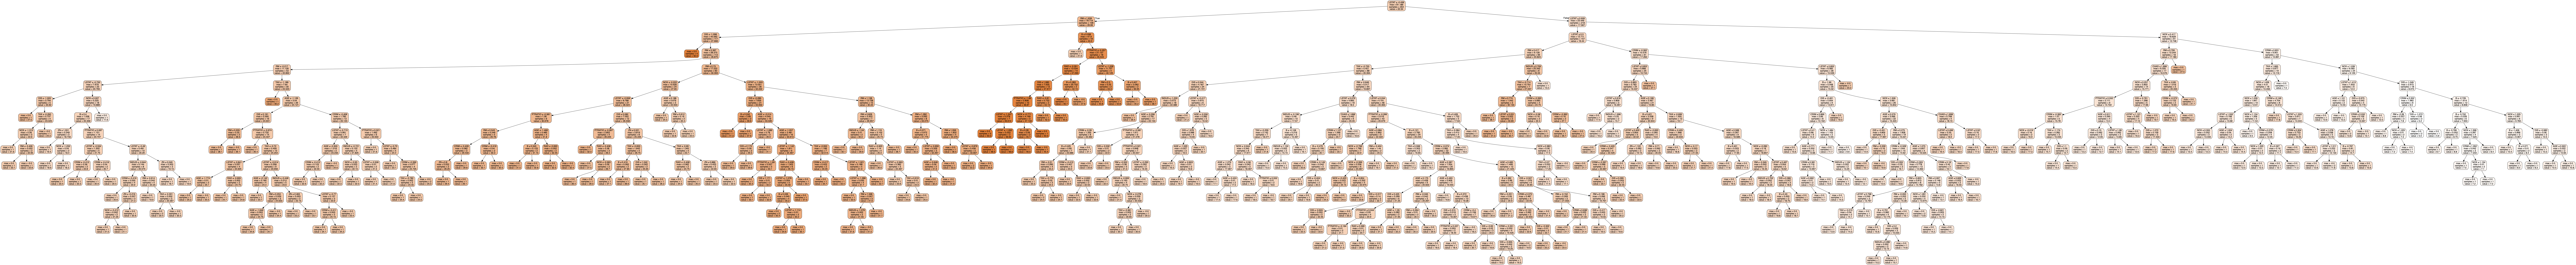

In [29]:
dot_data = StringIO()
export_graphviz(regressor,
                out_file=dot_data,
                max_depth=20,
                filled=True,
                rounded=True,
                special_characters=True,
                feature_names=boston.feature_names
                )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


### 4. Visualise the corresponding decision tree

### 5. Perform grid search varying the maximal tree depth, the maximal number of leaf nodes and the minimal number of samples in the leafs. Determine the best model using once the default R2 scoring and once 'neg_mean_squared_error' and compare.

In [31]:
from sklearn.model_selection import GridSearchCV

In [32]:
dtr_params = {
    'max_depth': list(range(1, 11))+[None],
    'max_features': [None, 1, 2, 3,4,5,6,7,8,9,10,11,12,13],
    'min_samples_split': [2, 3, 4, 5, 10, 15, 20, 25, 30, 40, 50]
}


In [34]:
model = DecisionTreeRegressor()
dtr_gs = GridSearchCV(model, dtr_params, cv=5, verbose=1, iid=False)

In [35]:
dtr_gs.fit(X, y)
dtr_best = dtr_gs.best_estimator_
print(dtr_gs.best_params_)
print(dtr_gs.best_score_)

Fitting 5 folds for each of 484 candidates, totalling 2420 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'max_depth': 8, 'max_features': 3, 'min_samples_split': 3}
0.5308869124714721


[Parallel(n_jobs=1)]: Done 2420 out of 2420 | elapsed:    3.6s finished


In [36]:
dtr_gs.fit(X_train, y_train)
dtr_best = dtr_gs.best_estimator_
print(dtr_gs.best_params_)
print(dtr_gs.best_score_)

Fitting 5 folds for each of 484 candidates, totalling 2420 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


{'max_depth': None, 'max_features': None, 'min_samples_split': 2}
0.7536574828316028


[Parallel(n_jobs=1)]: Done 2420 out of 2420 | elapsed:    3.3s finished


### 6. Now use ensemble methods to fit decision trees. For BaggingRegressor and RandomForestRegressor, vary the number of estimators (n_estimators). Use cross_val_score with five-fold cross validation and scoring 'neg_mean_squared_error'. Plot how the mean of the scoring changes.

In [39]:
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor

In [41]:
bagging = BaggingRegressor(base_estimator=model,
                            max_samples=0.5, 
                            max_features=0.5, 
                            n_estimators=500)

print("DT Bagging CV training score:\t", 
      cross_val_score(bagging, X_train, y_train,
                    cv=5, n_jobs=1).mean())

bagging.fit(X_train, y_train)
print("DT bagging test score:\t", bagging.score(X_test, y_test))

DT Bagging CV training score:	 0.7840285449005779
DT bagging test score:	 0.848820087575978


RandomForestRegressor(n_estimators=’warn’, criterion=’mse’, 
                      max_depth=None, min_samples_split=2, 
                      min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                      max_features=’auto’, max_leaf_nodes=None, 
                      min_impurity_decrease=0.0, min_impurity_split=None, 
                      bootstrap=True, oob_score=False, n_jobs=None, 
                      random_state=None, verbose=0, warm_start=False)

In [54]:
forest = RandomForestRegressor(n_estimators=100,
                           criterion="mse", max_depth=None,
                           min_samples_split=2,max_features="auto")

In [56]:
print("DT forest CV training score:\t", 
      cross_val_score(forest, X_train, y_train,
                    cv=5, n_jobs=1).mean())

forest.fit(X_train, y_train)
print("DT forest test score:\t", forest.score(X_test, y_test))

DT forest CV training score:	 0.848260627933118
DT forest test score:	 0.8982477612946371


In [60]:
print(forest.predict)

<bound method ForestRegressor.predict of RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)>


In [62]:
from sklearn.metrics import mean_squared_error

In [64]:
mean_squared_error(y, model.predict) 

TypeError: Expected sequence or array-like, got <class 'method'>

### Bonus: Vary further parameters and describe the impact on the model score.